In [96]:
import copy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

It turns out that one can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, and then train a linear model on this extended set of features. This technique is called *polynomial regression*.

In [4]:
auto = pd.read_csv('/Users/herrakaava/Documents/ML_DATA/auto_cleaned.csv', index_col=0)

In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [7]:
auto.isna().any().any()

False

Let's use `horsepower` to predict `mpg`.

In [17]:
hp = auto['horsepower'].values
mpg = auto['mpg'].values

In [20]:
def f1(data):
    plt.figure(figsize=(8,6), dpi=100)
    plt.scatter(data['horsepower'], data['mpg'], facecolors='none', edgecolors='black')
    plt.xlabel('Horsepower')
    plt.ylabel('Miles per gallon')

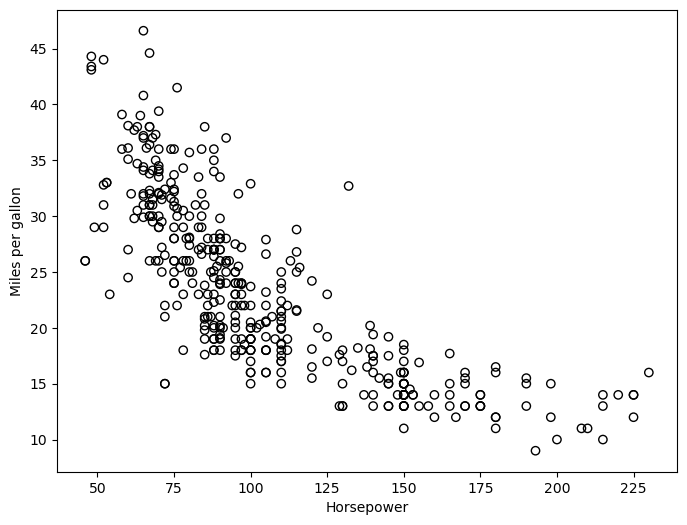

In [21]:
f1(auto)

In [12]:
def poly_reg(X, y, deg):
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False),
                          LinearRegression(fit_intercept=True))
    model.fit(X, y)
    return model

In [37]:
# Sort the based on the horsepower values in ascending order
hp_indices_sorted = np.argsort(hp)
hp_sorted = hp[hp_indices_sorted]
mpg_sorted = mpg[hp_indices_sorted]

# Make copies of hp_sorted and mpg_sorted to work with shorter variable names
X = copy.deepcopy(hp_sorted)[:, np.newaxis]    # PolynomialFeatures requires 2D feature arrays
y = copy.deepcopy(mpg_sorted)

In [49]:
deg_1_model = poly_reg(X, y, deg=1)
deg_2_model = poly_reg(X, y, deg=2)
deg_3_model = poly_reg(X, y, deg=3)
deg_4_model = poly_reg(X, y, deg=4)
deg_5_model = poly_reg(X, y, deg=5)

In [105]:
def y_pred(X, y, model):
    lin_reg = model.named_steps['linearregression']
    params = np.concatenate([[lin_reg.intercept_], lin_reg.coef_])
    
    # Use the PolynomialFeatures transformer to transform 
    # the original X to contain the higher degree features
    X_poly = model.named_steps['polynomialfeatures'].transform(X)
    
    # Add constant column
    X_poly = sm.add_constant(X_poly)
    
    # Linear combination of the parameter vector and the features (including bias)
    y_hat = X_poly @ params
    
    return y_hat

In [106]:
deg_1_curve = y_pred(X, y, model=deg_1_model)
deg_2_curve = y_pred(X, y, model=deg_2_model)
deg_3_curve = y_pred(X, y, model=deg_3_model)
deg_4_curve = y_pred(X, y, model=deg_4_model)
deg_5_curve = y_pred(X, y, model=deg_5_model)

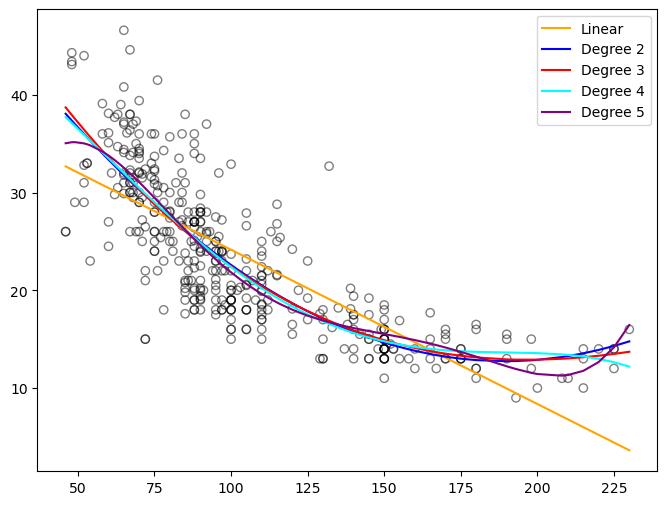

In [113]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(X, y, facecolors='none', edgecolors='black', alpha=0.5)
plt.plot(X, linear_curve, color='orange', label='Linear')
plt.plot(X, deg_2_curve, color='blue', label='Degree 2')
plt.plot(X, deg_3_curve, color='red', label='Degree 3')
plt.plot(X, deg_4_curve, color='cyan', label='Degree 4')
plt.plot(X, deg_5_curve, color='purple', label='Degree 5')
plt.legend();